#  Plotting and Visualization

In [122]:
import numpy as np
import pandas as pd
import random

## A Brief matplotlib API Primer

In [65]:
import matplotlib.pyplot as plt

In [66]:
# %matplotlib notebook

In [67]:
%matplotlib inline

In [68]:
import numpy as np

In [69]:
data = np.arange(10)

In [70]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

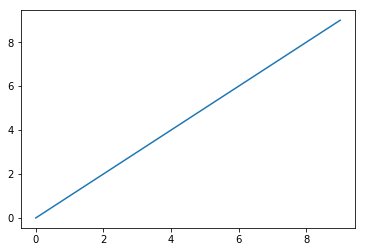

In [71]:
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a **Figure** object. You can create a new figure with **plt.figure**:

In [72]:
fig = plt.figure()

**plt.figure** has a number of options; notably, **figsize** will guarantee the figure has a certain size and aspect ratio if saved to disk.

In [73]:
fig = plt.figure(figsize=(50, 50))

You can’t make a plot with a blank figure. You have to create one or more subplots using **add_subplot**:

In [74]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1). 

In [75]:
ax2 = fig.add_subplot(2, 2, 2)

In [76]:
ax3 = fig.add_subplot(2, 2, 3)

**One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.**

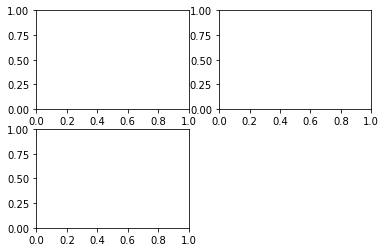

In [77]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

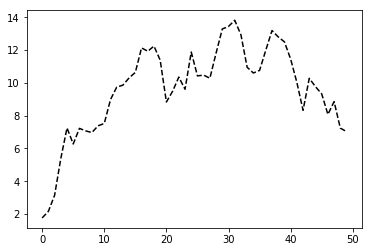

In [78]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the _**last figure and subplot used (creating one if necessary)**_, thus hiding the figure and subplot creation.

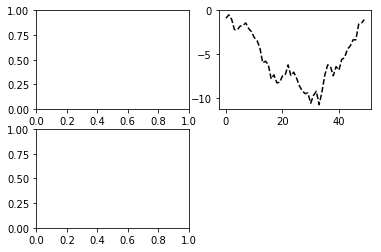

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax3 = fig.add_subplot(2, 2, 3)

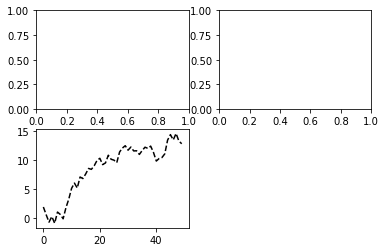

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The objects returned by *fig.add_subplot* here are **AxesSubplot** objects, on which you can directly plot on the other empty subplots by calling each one’s instance method:

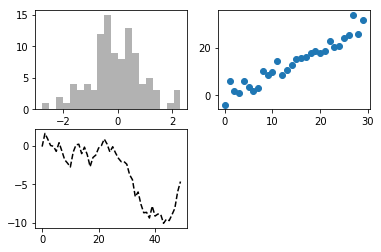

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') #ax3.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Creating a figure with a _grid of subplots_ is a very common task, so matplotlib includes a convenience method, **plt.subplots**, that creates a new figure and returns a NumPy array containing the created subplot objects:

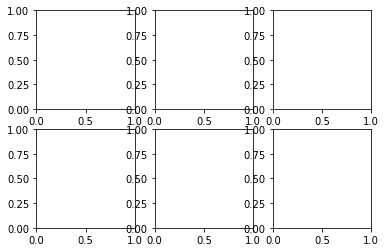

In [82]:
fig, axes = plt.subplots(2, 3)

In [83]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000119DFC18>,
      dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, **axes[0, 1]**. You can also indicate that subplots should have the same x- or y-axis using **sharex** and **sharey**, respectively. This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently.

![alt text](images/subplot.png "pyplot.subplots options")

#### Adjusting the spacing around subplots

You can change the spacing using the **subplots_adjust** method on *Figure* objects, also available as a top-level function:

In [84]:
#subplots_adjust(left=None, bottom=None, right=None, top=None,
#wspace=None, hspace=None)

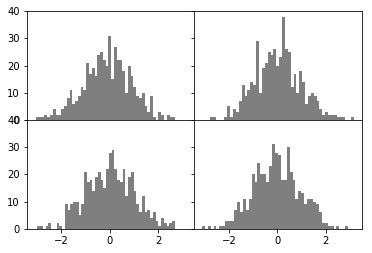

In [85]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

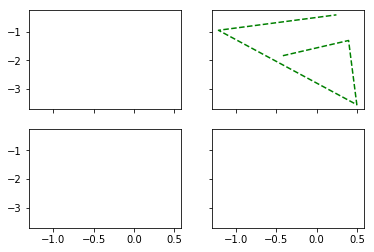

In [86]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0, 1].plot(np.random.randn(5), 2 * np.random.randn(5), linestyle='--', color='g')

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').
You can see the full set of line styles by looking at the docstring for plot (use plot? in IPython or Jupyter).

The marker can be part of the style string, which must have color followed by marker type and line style

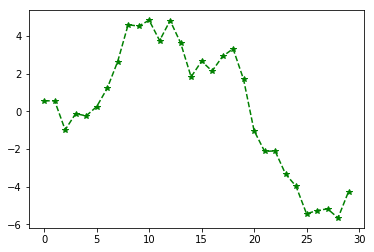

In [87]:
plt.plot(np.random.randn(30).cumsum(), 'g*--')

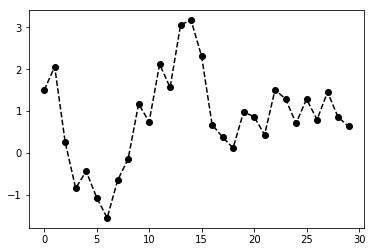

In [88]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the **drawstyle** option

In [89]:
data = np.random.randn(30).cumsum()

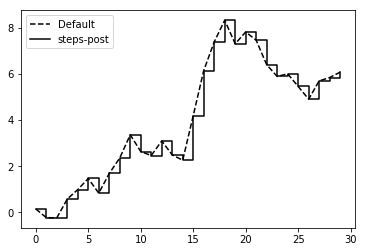

In [90]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: 

* using the procedural pyplot interface (i.e., matplotlib.pyplot) 

* object-oriented native matplotlib API.

The *pyplot* interface, designed for interactive use, consists of methods like **xlim,
xticks, and xticklabels**. They can be used in two ways:

* Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created **AxesSubplot**. Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are **ax.get_xlim** and **ax.set_xlim**. I prefer to use the subplot instance methods myself in the interest of being explicit (and especially when working with multiple subplots), but you can certainly use whichever you find more convenient.

### Setting the title, axis labels, ticks, and ticklabels

Text(0.5,0,'Stages')

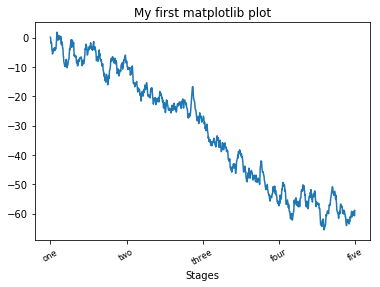

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

To change the **x-axis** ticks, it’s easiest to use **set_xticks** and **set_xticklabels**. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using **set_xticklabels**:

The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

In [92]:
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,17.2,'Stages'), Text(0.5,1,'My first matplotlib plot')]

### Adding legends

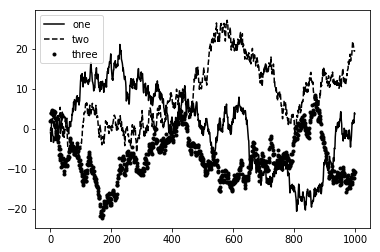

In [93]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Saving Plots to File

You can save the active figure to file using **plt.savefig**. This method is equivalent to the figure object’s **savefig** instance method.

In [94]:
plt.savefig('figpath.svg')

In [95]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### Plotting with pandas and seaborn

You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

pandas itself has built-in methods that simplify creating visualizations from Data‐Frame and Series objects. Another library is seaborn, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization
types.

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do
not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

### Line Plots

Series and DataFrame each have a **plot** attribute for making some basic plot types. 

By default, **plot()** makes line plots (see Figure 9-13):

In [96]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [97]:
s

0     0.554253
10   -0.987989
20   -2.245519
30   -1.974017
40   -0.683788
50   -0.930329
60   -0.587850
70   -1.618283
80    0.146660
90    0.994219
dtype: float64

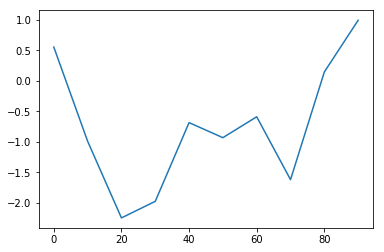

In [98]:
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing **use_index=False**. The x-axis ticks and limits can be adjusted with the **xticks** and **xlim** options, and y-axis respectively with **yticks** and **ylim**

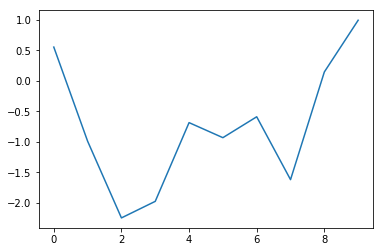

In [99]:
s.plot(use_index=False)

![alt text](images/seriesplot.png "Series.plot method arguments")

Most of pandas’s plotting methods accept an optional **ax** parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

DataFrame’s **plot** method plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [134]:
np.random.seed(0)

In [137]:
df = pd.DataFrame(
    np.random.randint(0,10,40).reshape(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))

In [138]:
df

,A,B,C,D
0,4,7,3,2
10,11,9,3,2
20,15,14,8,8
30,23,18,9,12
40,32,26,10,13
50,39,35,19,16
60,45,42,21,16
70,48,47,30,20
80,52,53,34,24
90,55,57,38,32


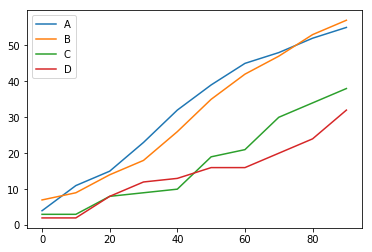

In [141]:
df.plot()

The plot attribute contains a “family” of methods for different plot types. For example, df.plot() is equivalent to df.plot.line().

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.

![alt text](images/dataframeplot.png "Series.plot method arguments")

### Bar Plots

The plot.bar() and plot.barh() make vertical and horizontal bar plots

the Series or DataFrame index will be used as the x (bar) or y (barh) ticks

In [103]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [104]:
data

a    0.282068
b    0.716998
c    0.263438
d    0.713917
e    0.736760
f    0.093465
g    0.741661
h    0.029579
i    0.777669
j    0.089939
k    0.046548
l    0.533993
m    0.480529
n    0.768011
o    0.231694
p    0.928873
dtype: float64

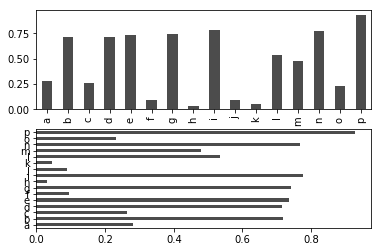

In [105]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [106]:
df = pd.DataFrame(np.random.rand(6, 4),
index=['one', 'two', 'three', 'four', 'five', 'six'],
columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [107]:
df

Genus,A,B,C,D
one,0.819716,0.407467,0.956412,0.264772
two,0.251524,0.289743,0.619890,0.194948
three,0.883349,0.606290,0.947272,0.894455
four,0.495775,0.317834,0.898500,0.964136
five,0.864993,0.733429,0.387461,0.582953
six,0.935540,0.667239,0.295906,0.532022


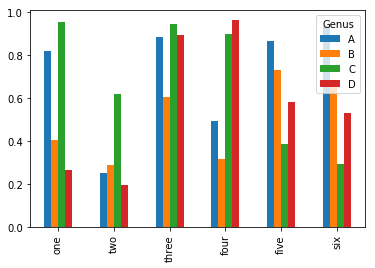

In [108]:
df.plot.bar()

We create stacked bar plots from a DataFrame by passing **stacked=True**, resulting in the value in each row being stacked together 

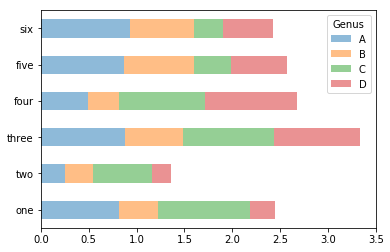

In [109]:
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for bar plots is to visualize a Series’s value frequency using value_counts: *s.value_counts().plot.bar()*

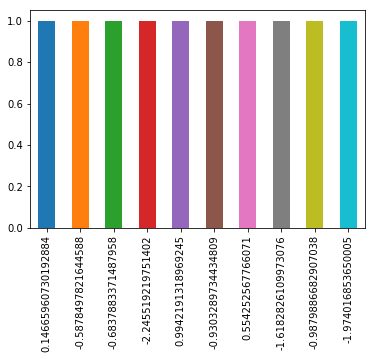

In [110]:
s.value_counts().plot.bar()

suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a cross-tabulation by day and party size: